In [1]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import matplotlib.pyplot as plt
import re
import random
from spacy.util import minibatch, compounding

import pandas as pd
import numpy as np
import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [2]:
df = pd.read_csv('african_climate_change_data (1).csv')
df.head()

,created_utc,body
0,2017-05-15 23:56:50,i'll start off by saying that i agree that cli...
1,2017-05-15 21:57:39,lots of possible reasons...\n\n1. we out-compe...
2,2017-05-15 21:38:27,"well 150 years ago, currencies were valued qui..."
3,2017-05-15 21:19:36,you say that even as the evidence to the contr...
4,2017-05-15 21:15:07,"&gt; savages, non-civilized peoples so africa,..."


In [3]:
#df = df.sample(n=10000)
df.shape

(72854, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72854 entries, 0 to 72853
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_utc  72854 non-null  object
 1   body         72854 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [5]:
df["created_utc"] = pd.to_datetime(df["created_utc"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72854 entries, 0 to 72853
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   created_utc  72854 non-null  datetime64[ns]
 1   body         72854 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.1+ MB


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Define a function to clean the text data
def clean_text(text):
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    # Remove punctuation and digits
    words = [re.sub(r'[^\w\s]|\d', '', word) for word in words]
    # Convert to lowercase
    words = [word.lower() for word in words]
    return ' '.join(words)

# Apply the cleaning function to relevant columns

In [9]:
df['cleaned_text'] = df["body"].apply(clean_text)

stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]
word_arr = [f"word{i}" for i in range(len(stop_words))]
#print(word_arr)
top_words = dict(zip(word_arr, stop_words))

for word in top_words:
    df['cleaned_text'] = df['body'].str.replace(word, top_words[word])
df.head()

,created_utc,body,cleaned_text
0,2017-05-15 23:56:50,i'll start off by saying that i agree that cli...,i'll start off by saying that i agree that cli...
1,2017-05-15 21:57:39,lots of possible reasons...\n\n1. we out-compe...,lots of possible reasons...\n\n1. we out-compe...
2,2017-05-15 21:38:27,"well 150 years ago, currencies were valued qui...","well 150 years ago, currencies were valued qui..."
3,2017-05-15 21:19:36,you say that even as the evidence to the contr...,you say that even as the evidence to the contr...
4,2017-05-15 21:15:07,"&gt; savages, non-civilized peoples so africa,...","&gt; savages, non-civilized peoples so africa,..."


In [10]:
df_data = df.reset_index().drop(["index","body"], axis=1)
df_data.head()

,created_utc,cleaned_text
0,2017-05-15 23:56:50,i'll start off by saying that i agree that cli...
1,2017-05-15 21:57:39,lots of possible reasons...\n\n1. we out-compe...
2,2017-05-15 21:38:27,"well 150 years ago, currencies were valued qui..."
3,2017-05-15 21:19:36,you say that even as the evidence to the contr...
4,2017-05-15 21:15:07,"&gt; savages, non-civilized peoples so africa,..."


### sentiment for specific entities/topics over time

In [11]:
from textblob import TextBlob

/var/folders/xj/rff3sq3s5m56q04vp721kr_00000gn/T/ipykernel_1065/1635499293.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_data.resample('D', on='created_utc').mean().reset_index()


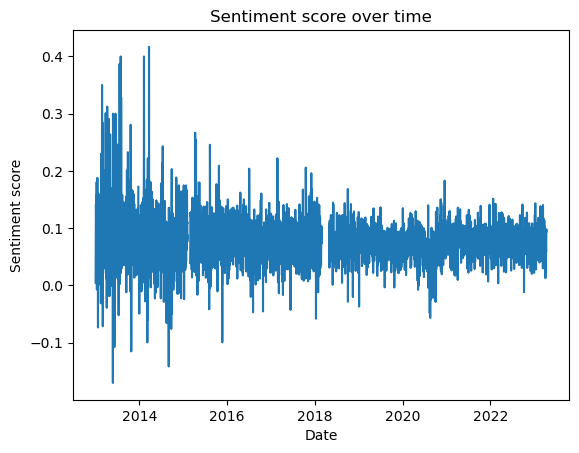

In [12]:
# Create a new column for the sentiment polarity score
df_data['sentiment'] = df_data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Resample the DataFrame by day and calculate the mean sentiment score for each day
df_resampled = df_data.resample('D', on='created_utc').mean().reset_index()

# Plot the sentiment scores over time
plt.plot(df_resampled['created_utc'], df_resampled['sentiment'])
plt.xlabel("Date")
plt.ylabel("Sentiment score")
plt.title("Sentiment score over time")
plt.show()

In [13]:
from matplotlib.widgets import Cursor

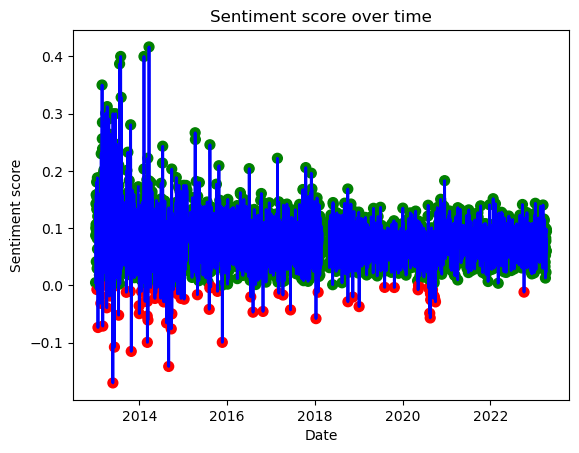

In [14]:

# Define colors for positive, negative, and neutral sentiment scores
colors = ['green' if score > 0 else 'red' if score < 0 else 'gray' for score in df_resampled['sentiment']]

# Plot the sentiment scores over time
fig, ax = plt.subplots()
ax.plot(df_resampled['created_utc'], df_resampled['sentiment'], color='blue', linewidth=2)
ax.scatter(df_resampled['created_utc'], df_resampled['sentiment'], c=colors, s=50)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Sentiment score")
plt.title("Sentiment score over time")

# Add cursor to the plot
cursor = Cursor(ax, useblit=True, color='black', linewidth=1)
plt.show()

In [15]:
from matplotlib.widgets import Cursor, Slider

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


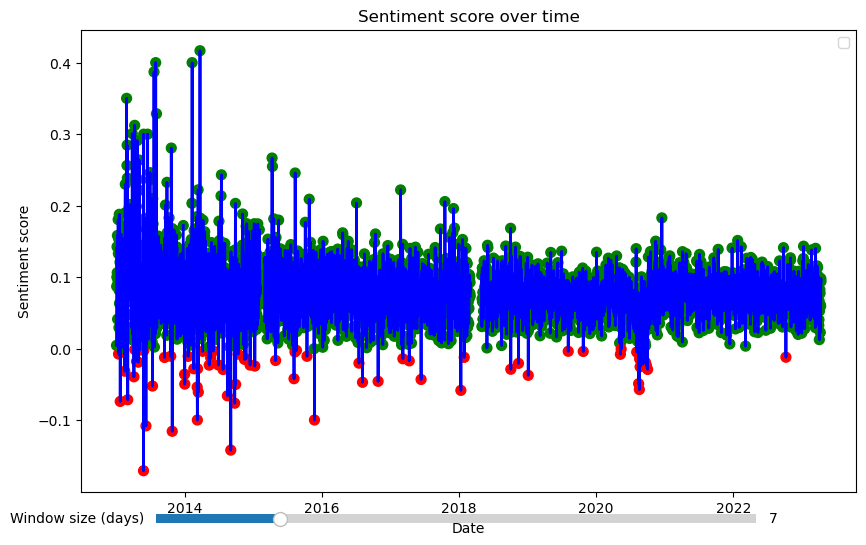

In [16]:
# Define colors for positive, negative, and neutral sentiment scores
colors = ['green' if score > 0 else 'red' if score < 0 else 'gray' for score in df_resampled['sentiment']]

# Define figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sentiment scores over time
line_plot, = ax.plot(df_resampled['created_utc'], df_resampled['sentiment'], color='blue', linewidth=2)
scatter_plot = ax.scatter(df_resampled['created_utc'], df_resampled['sentiment'], c=colors, s=50)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Sentiment score")
plt.title("Sentiment score over time")

plt.legend()

# Add cursor to the plot
cursor = Cursor(ax, useblit=True, color='black', linewidth=1)

# Add slider
ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])
slider = Slider(ax_slider, 'Window size (days)', valmin=1, valmax=30, valinit=7, valstep=1)

# Define function to update plot based on slider value
def update(val):
    window_size = int(slider.val)
    df_resampled_slider = df.resample('{}D'.format(window_size), on='created_utc').mean().reset_index()
    colors_slider = ['green' if score > 0 else 'red' if score < 0 else 'gray' for score in df_resampled_slider['sentiment']]
    line_plot.set_xdata(df_resampled_slider['created_utc'])
    line_plot.set_ydata(df_resampled_slider['sentiment'])
    scatter_plot.set_offsets(df_resampled_slider[['created_utc', 'sentiment']])
    scatter_plot.set_facecolor(colors_slider)
    fig.canvas.draw_idle()

# Connect slider to update function
slider.on_changed(update)

plt.show()

### spikes in posts correlated with events

In [17]:
data_df = df_data.copy()
data_df["created_utc"]=data_df["created_utc"].astype(str)

In [18]:
# Define the events and their corresponding dates
events = {
    "Central Africa Climate Change": "2015-04-24",
    "Sahel Drought": "1968-01-01",
    "Cape Town Water Crisis": "2018-01-01",
    "Lake Chad Crisis": "2009-01-01",
    "Horn of Africa Drought": "2011-01-01"
}


# Create a new column in the dataframe to store the event name
data_df["event"] = ""

# Loop through the events and their dates and label the corresponding posts
for event, date in events.items():
    data_df.loc[data_df["created_utc"].str.startswith(date), "event"] = event

# Count the number of posts made on or around each event date
for event, date in events.items():
    post_count = data_df[data_df["event"] == event].shape[0]
    print(f"{event}: {post_count} posts")

Central Africa Climate Change: 6 posts
Sahel Drought: 0 posts
Cape Town Water Crisis: 14 posts
Lake Chad Crisis: 0 posts
Horn of Africa Drought: 0 posts


In [19]:
# Count the number of posts made on or around each event date
post_counts = []
for event, date in events.items():
    post_count = data_df[data_df["event"] == event].shape[0]
    post_counts.append(post_count)

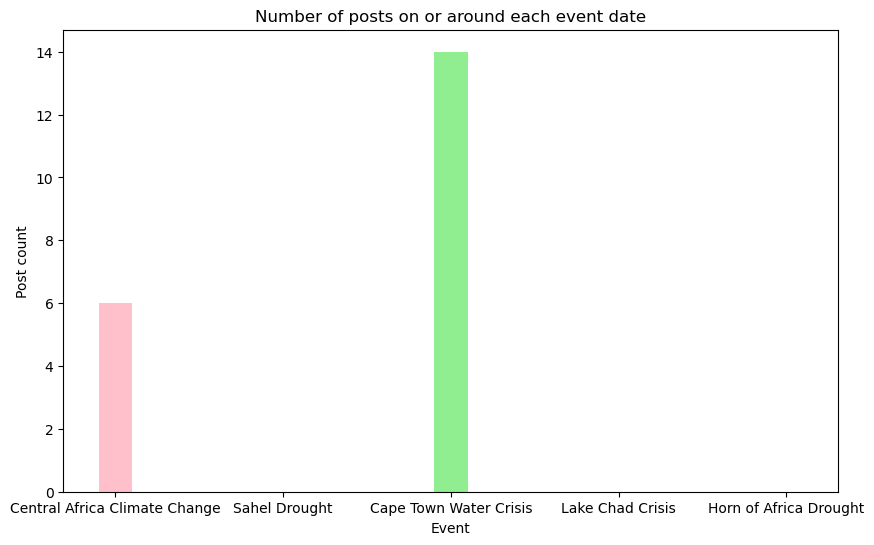

In [20]:
plt.figure(figsize=(10, 6))  
colors = ['#FFC0CB', '#ADD8E6', '#90EE90', '#FFDAB9']  # Define custom colors for the bars
#plt.bar(events.keys(), post_counts, color=colors)  # Set the color of the bars
plt.bar(events.keys(), post_counts, color=colors, width=0.2)
plt.title("Number of posts on or around each event date")
plt.xlabel("Event")
plt.ylabel("Post count")

# Show the plot
plt.show()

In [21]:
df = df_data.copy()

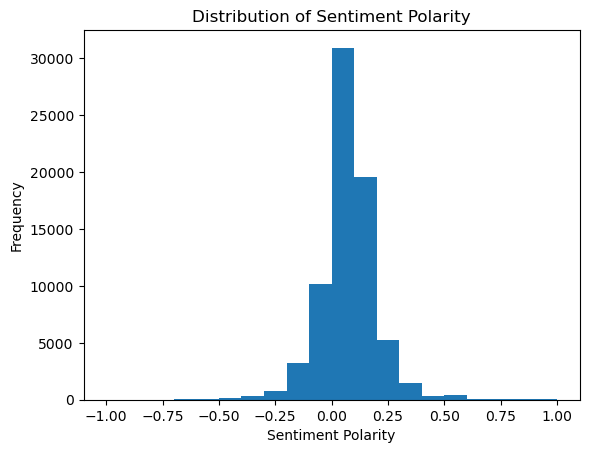

In [22]:
df['sentiment_polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# plot a histogram of the sentiment polarity
plt.hist(df['sentiment_polarity'], bins=20)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()

In [23]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
import pandas as pd
import spacy

In [31]:
df.head()

,created_utc,cleaned_text,sentiment,sentiment_polarity,entities
0,2017-05-15 23:56:50,i'll start off by saying that i agree that cli...,0.049741,0.049741,[]
1,2017-05-15 21:57:39,lots of possible reasons...\n\n1. we out-compe...,-0.001204,-0.001204,[]
2,2017-05-15 21:38:27,"well 150 years ago, currencies were valued qui...",0.105007,0.105007,[]
3,2017-05-15 21:19:36,you say that even as the evidence to the contr...,0.033363,0.033363,[]
4,2017-05-15 21:15:07,"&gt; savages, non-civilized peoples so africa,...",-0.075446,-0.075446,[]


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72854 entries, 0 to 72853
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_utc         72854 non-null  datetime64[ns]
 1   cleaned_text        72854 non-null  object        
 2   sentiment           72854 non-null  float64       
 3   sentiment_polarity  72854 non-null  float64       
 4   entities            72854 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.8+ MB


In [33]:
nlp = spacy.load('en_core_web_sm')

In [34]:
df = df.sample(n=1000)

In [35]:
df.shape

(1000, 5)

In [42]:
time_interval = 7

# Extract named entities from the 'cleaned_text' column using spacy
entities = []
for text in df['cleaned_text']:
    doc = nlp(text)
    entities.append([ent.text for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE']])

# Create a new dataframe with the extracted entities and their associated time intervals
data = {'entities': entities, 'time_interval': pd.cut(df['created_utc'], pd.date_range(start=df['created_utc'].min(), end=df['created_utc'].max(), freq=f'{time_interval}D'))}
df_entities = pd.DataFrame(data)

In [43]:
df_entities = df_entities.reset_index().drop("index", axis=1)

In [44]:
df_entities

,entities,time_interval
0,"[co2 hardly, the university of utah]","(2020-01-19 21:13:49, 2020-01-26 21:13:49]"
1,"[north korea, south korea, iran, iran, israel,...","(2020-02-23 21:13:49, 2020-03-01 21:13:49]"
2,"[ben ali, russia, russia, russia]","(2019-09-08 21:13:49, 2019-09-15 21:13:49]"
3,[],"(2013-09-15 21:13:49, 2013-09-22 21:13:49]"
4,"[hungary, roger boyes, brexit, the european un...","(2017-07-09 21:13:49, 2017-07-16 21:13:49]"
...,...,...
995,"[india, pakistan]","(2021-10-31 21:13:49, 2021-11-07 21:13:49]"
996,[],"(2019-12-22 21:13:49, 2019-12-29 21:13:49]"
997,[],"(2015-05-10 21:13:49, 2015-05-17 21:13:49]"
998,"[florida, south africa]","(2020-08-02 21:13:49, 2020-08-09 21:13:49]"


In [58]:
df_entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   entities       1000 non-null   object  
 1   time_interval  997 non-null    category
dtypes: category(1), object(1)
memory usage: 34.4+ KB


In [54]:
import numpy as np

In [62]:
time_data = []
for i in df_entities["time_interval"].values:
    interval_str = str(i)
    timestamp_list = interval_str.strip("()[]").split(", ")
    stamp = timestamp_list[0].split(" ")[0]
    time_data.append(stamp)
    

df_entities["time_info"] = time_data

In [64]:
df_entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   entities       1000 non-null   object  
 1   time_interval  997 non-null    category
 2   time_info      1000 non-null   object  
dtypes: category(1), object(2)
memory usage: 42.2+ KB


In [65]:
ent_df = df_entities[["entities", "time_info"]]
ent_df

,entities,time_info
0,"[co2 hardly, the university of utah]",2020-01-19
1,"[north korea, south korea, iran, iran, israel,...",2020-02-23
2,"[ben ali, russia, russia, russia]",2019-09-08
3,[],2013-09-15
4,"[hungary, roger boyes, brexit, the european un...",2017-07-09
...,...,...
995,"[india, pakistan]",2021-10-31
996,[],2019-12-22
997,[],2015-05-10
998,"[florida, south africa]",2020-08-02


In [66]:
# Group the entities by time interval and count their frequency
entity_counts = ent_df.groupby('time_info')['entities'].apply(lambda x: pd.Series([ent for sublist in x for ent in sublist]).value_counts())
entity_counts
# Plot the frequency of the top 10 entities over time

/var/folders/xj/rff3sq3s5m56q04vp721kr_00000gn/T/ipykernel_1065/459393337.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  entity_counts = ent_df.groupby('time_info')['entities'].apply(lambda x: pd.Series([ent for sublist in x for ent in sublist]).value_counts())
/var/folders/xj/rff3sq3s5m56q04vp721kr_00000gn/T/ipykernel_1065/459393337.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  entity_counts = ent_df.groupby('time_info')['entities'].apply(lambda x: pd.Series([ent for sublist in x for ent in sublist]).value_counts())
/var/folders/xj/rff3sq3s5m56q04vp721kr_00000gn/T/ipykernel_1065/459393337.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this 

/var/folders/xj/rff3sq3s5m56q04vp721kr_00000gn/T/ipykernel_1065/459393337.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  entity_counts = ent_df.groupby('time_info')['entities'].apply(lambda x: pd.Series([ent for sublist in x for ent in sublist]).value_counts())
/var/folders/xj/rff3sq3s5m56q04vp721kr_00000gn/T/ipykernel_1065/459393337.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  entity_counts = ent_df.groupby('time_info')['entities'].apply(lambda x: pd.Series([ent for sublist in x for ent in sublist]).value_counts())
/var/folders/xj/rff3sq3s5m56q04vp721kr_00000gn/T/ipykernel_1065/459393337.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this 

time_info                  
2013-01-20  india              2
            china              2
            australia          1
            h. erectus         1
            s.e.               1
                              ..
nan         un                 1
            egypt              1
            ukraine moldova    1
            north africa       1
            georgia            1
Name: entities, Length: 3912, dtype: int64

In [ ]:
entity_counts.head(10).transpose().plot()

In [ ]:
###Questions